In [1]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Scikit-Learn ML models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Model Evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Data
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## EDA

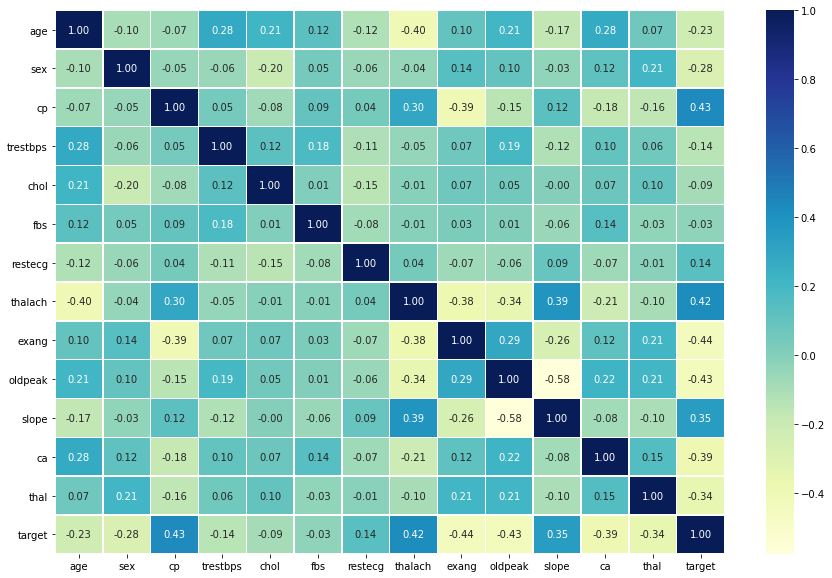

In [6]:
# Visualizing the correlation matrix
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap='YlGnBu');

In [7]:
type(data.corr())

pandas.core.frame.DataFrame

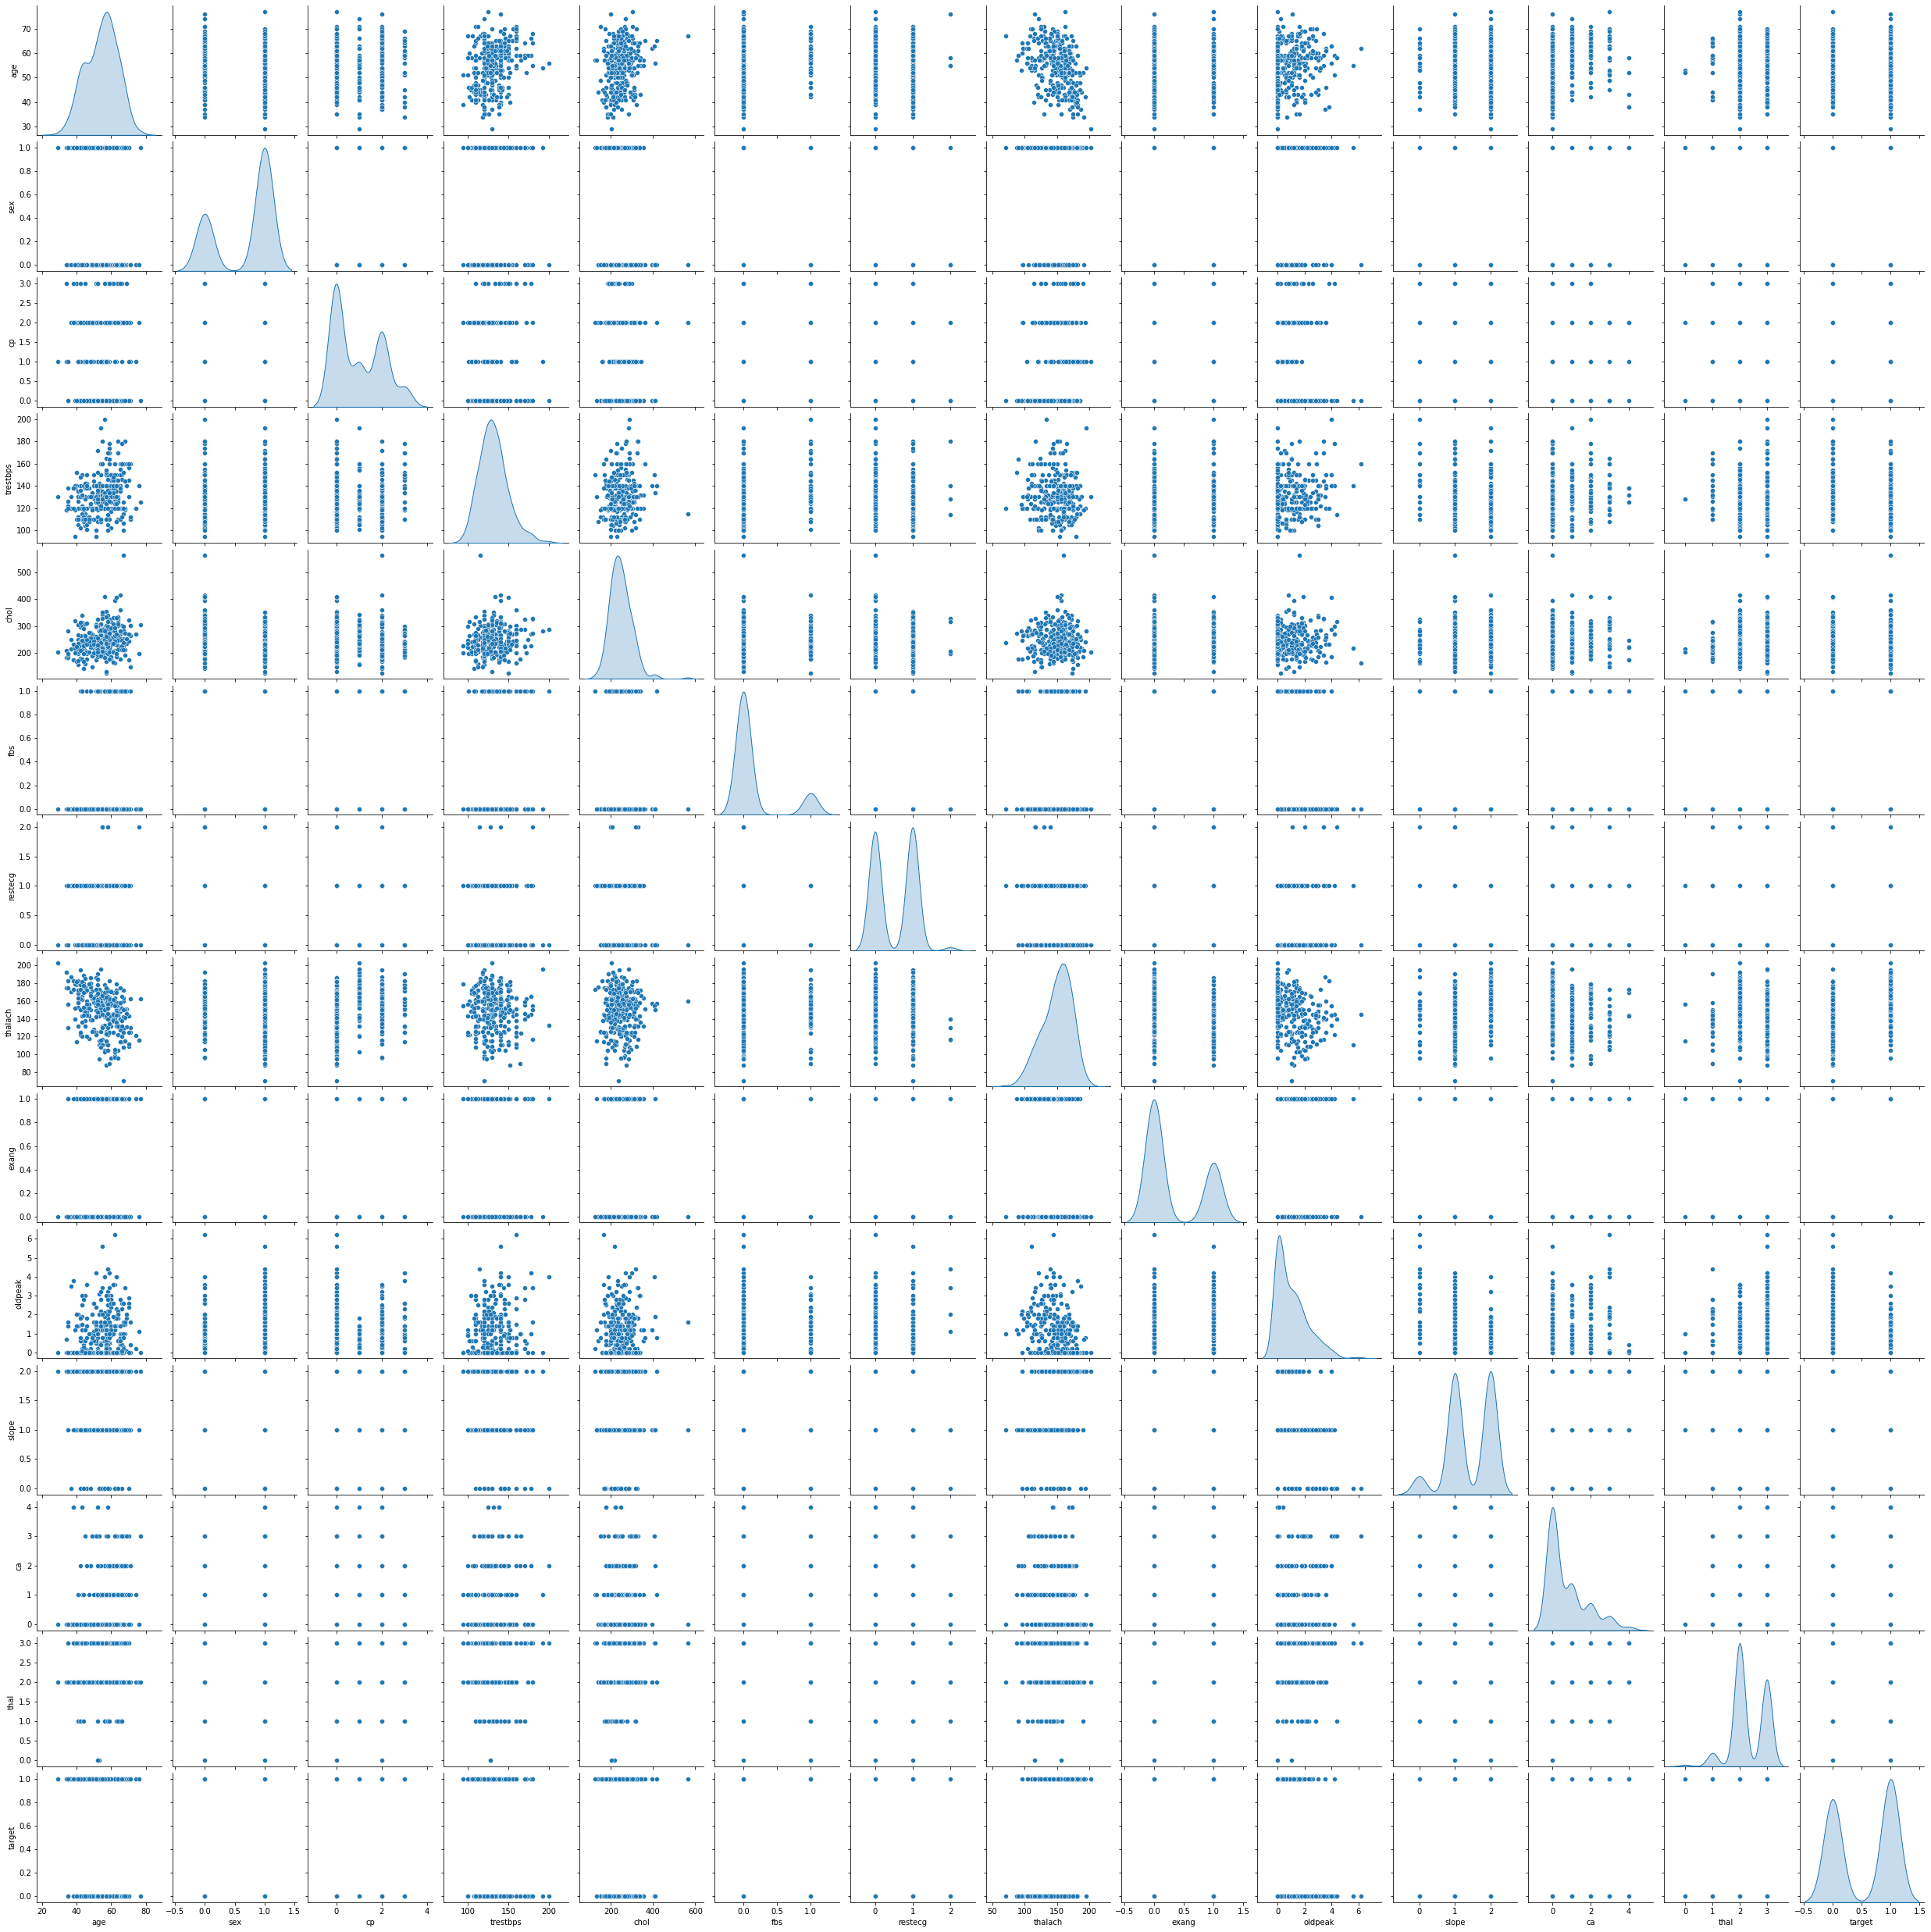

In [8]:
# Bivariate analysis
sns.pairplot(data, diag_kind='kde')

Number of Positive cases: 165. Percentage = 54.45544554455446
Number of Negative cases: 138. Percentage = 45.54455445544555


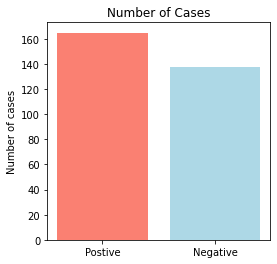

In [9]:
# Calculate heart disease ratio from true/false of outcome variable
n_true = len(data.loc[data['target'] == True])
n_false = len(data.loc[data['target'] == False ])
print("Number of Positive cases: {0}. Percentage = {1}".format(n_true, n_true/(n_true + n_false) * 100))
print("Number of Negative cases: {0}. Percentage = {1}".format(n_false, n_false/(n_true + n_false) * 100))

# Visualization
dic_1 = {"Postive": n_true, "Negative": n_false}
fig, ax = plt.subplots(figsize=(4, 4))
ax.bar(dic_1.keys(), dic_1.values(), width=0.8, color=['salmon', 'lightblue'])
ax.set(title="Number of Cases",
       ylabel="Number of cases");

In [10]:
# Ratio of male and female postive & negative cases
pd.crosstab(data['sex'], data['target'])

target,0,1
sex,,
0,24,72
1,114,93


## Modelling

In [11]:
# Find the categorical variables
categorical_variables = []

for column in data:
    if len(data[column].unique()) <= 10:
        categorical_variables.append(column)

# Remove the target variable
categorical_variables.remove('target')

print(categorical_variables)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


In [12]:
# Make dummy variables for categorical variables
data = pd.get_dummies(data, columns=categorical_variables)

In [13]:
# Split the data
X = data.drop('target', axis=1)
y = data['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [15]:
# Non-scaled data
X_train_ws = X_train
X_test_ws = X_test

In [16]:
# Scaled data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## K-NEAREST NEIGHBOUR

In [17]:
train_scores = {}
test_scores = {}

train_scores_l = []
test_scores_l = []

# Number of neighbors
neighbors = range(1, 50)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through the different number of neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.update({str(i) :knn.score(X_train, y_train)})
    test_scores.update({str(i) :knn.score(X_test, y_test)})
    test_scores_l.append(knn.score(X_test, y_test))
    train_scores_l.append(knn.score(X_train, y_train))

In [18]:
# Maximum train score value
max_train_val = max(train_scores.values())
max_train_val

1.0

In [19]:
# Calculate the mean of training scores
dict_vals = train_scores.values()

vals_list = []

for i in dict_vals:
    vals_list.append(i)
    
arr_1 = np.array(vals_list)
arr_1.mean()

0.874093439028504

In [20]:
# Maximum test score value
max_test_val = max(test_scores.values())
max_test_val

0.819672131147541

In [21]:
# Calculate the mean of test scores
dict_vals_2 = test_scores.values()

vals_list_2 = []

for i in dict_vals_2:
    vals_list_2.append(i)
    
arr_2 = np.array(vals_list)
arr_2.mean()

0.874093439028504

Maximum KNN score on the test data: 81.97%


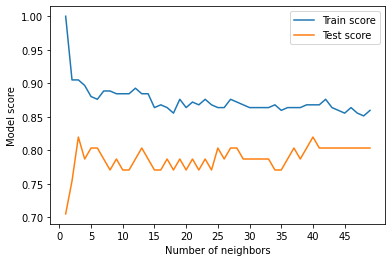

In [22]:
plt.plot(neighbors, train_scores_l, label="Train score")
plt.plot(neighbors, test_scores_l, label="Test score")
plt.xticks(np.arange(0, 50, 5))
plt.xlabel("Number of neighbors")
plt.ylabel('Model score')
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores_l)*100:.2f}%");

In [23]:
# Find number of neighbors with the highest accuracy
n_trees = max_test_val

# Empty list to store the best number of neighbors
max_key = []
for key, val in test_scores.items(): 
    if val == n_trees:
        print(key)
        max_key.append(key)

3
40


In [24]:
# Scale X for cross-validation
X_scaled = sc.fit_transform(X)

In [25]:
# Take the best number of neighbors
best_num = int(max_key[1])

In [26]:
# Initiate KNN instance
knn_cv = KNeighborsClassifier(n_neighbors=best_num)

In [27]:
# Cross-validated accuracy
cv_knn = cross_val_score(knn_cv, 
                         X_scaled, 
                         y, 
                         cv=5, 
                         scoring='accuracy')

In [28]:
cv_knn

array([0.81967213, 0.90163934, 0.80327869, 0.81666667, 0.85      ])

In [29]:
# Average of cross-validated scores
cv_knn.mean()

0.8382513661202184

In [30]:
# Standard deviation of cross-validated scores
cv_knn.std()

0.03518591073671226

In [31]:
# Setting up parameters for Randomized Search CV and Grid Search CV
KNN_params = {'n_neighbors': [3,40],
             'p': [1, 2, 5]}

In [32]:
# Perform Randomized Search on KNN model
rs_KNN = RandomizedSearchCV(estimator=KNeighborsClassifier(),
                     param_distributions=KNN_params,
                     cv=5,
                     verbose=True,
                     n_iter=12)

rs_KNN.fit(X_train, y_train)

c:\users\prach\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 6 is smaller than n_iter=12. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=12,
                   param_distributions={'n_neighbors': [3, 40], 'p': [1, 2, 5]},
                   verbose=True)

In [33]:
rs_KNN.best_params_

{'p': 2, 'n_neighbors': 40}

In [34]:
rs_KNN.score(X_train, y_train)

0.8677685950413223

In [35]:
rs_KNN.score(X_test, y_test)

0.819672131147541

In [36]:
# Final model
clf_knn = KNeighborsClassifier(n_neighbors=best_num)
clf_knn.fit(X_train, y_train)
# Model score on test data
clf_knn.score(X_test, y_test)

0.819672131147541

In [37]:
# Model score on train data
clf_knn.score(X_train, y_train)

0.8677685950413223

In [38]:
y_preds_knn = clf_knn.predict(X_test)

In [39]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds_knn))

[[23  7]
 [ 4 27]]


In [41]:
# Classification report
print(classification_report(y_test, y_preds_knn))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        30
           1       0.79      0.87      0.83        31

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



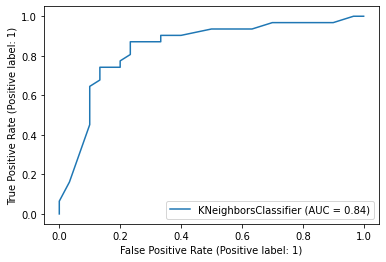

In [42]:
## Plot ROC curve and calculate AUC metric
plot_roc_curve(clf_knn, X_test, y_test);

## LOGISTIC REGRESSION

In [43]:
# Logistic Regression grid for hyperparameter tuning
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               'solver': ['liblinear']}

In [44]:
# Perform RandomizedSearchCV on logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(random_state=7),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=7),
                   n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [45]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.1082636733874054}

In [46]:
rs_log_reg.score(X_test, y_test)

0.8032786885245902

In [47]:
y_preds_rslg = rs_log_reg.predict(X_test)

In [48]:
print(confusion_matrix(y_test, y_preds_rslg))

[[22  8]
 [ 4 27]]


In [49]:
# Perform GridSearchCV on logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(random_state=7),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=7),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [50]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [51]:
gs_log_reg.score(X_test, y_test)

0.8032786885245902

In [52]:
cv_log_reg = cross_val_score(LogisticRegression(C=0.1082636733874054,
                                               solver='liblinear'),
                            X_scaled,
                            y,
                            cv=5,
                            scoring='accuracy')

In [53]:
cv_log_reg

array([0.86885246, 0.8852459 , 0.80327869, 0.85      , 0.8       ])

In [54]:
cv_log_reg.mean()

0.8414754098360657

In [55]:
cv_log_reg.std() * 100

3.4401239954403215

In [56]:
# Final model
clf_log = LogisticRegression(C=0.1082636733874054,
                            solver='liblinear')

clf_log.fit(X_train, y_train)

LogisticRegression(C=0.1082636733874054, solver='liblinear')

In [58]:
y_preds_clf_log = clf_log.predict(X_test)

In [57]:
clf_log.score(X_test, y_test)

0.8032786885245902

In [104]:
print(confusion_matrix(y_test,y_preds_clf_log))

[[22  8]
 [ 4 27]]


In [59]:
print(classification_report(y_test, y_preds_clf_log))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        30
           1       0.77      0.87      0.82        31

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



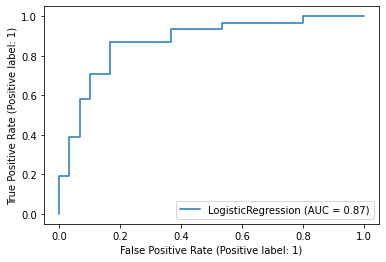

In [60]:
# Plot ROC Curve
plot_roc_curve(clf_log, X_test, y_test)

## SUPPORT VECTOR MACHINE

In [61]:
# GridSearch
svm_grid = {"C": np.logspace(-1, 2, 20),
            "gamma": np.logspace(-4, 2, 20)}

In [62]:
gs_svm = GridSearchCV(SVC(kernel='rbf', random_state=7),
                      param_grid=svm_grid,
                      cv=5,
                      verbose=True)

gs_svm.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5, estimator=SVC(random_state=7),
             param_grid={'C': array([  0.1       ,   0.14384499,   0.20691381,   0.29763514,
         0.42813324,   0.61584821,   0.88586679,   1.27427499,
         1.83298071,   2.6366509 ,   3.79269019,   5.45559478,
         7.8475997 ,  11.28837892,  16.23776739,  23.35721469,
        33.59818286,  48.32930239,  69.51927962, 100.        ]),
                         'gamma': array([1.00000000e-04, 2.06913808e-04, 4.28133240e-04, 8.85866790e-04,
       1.83298071e-03, 3.79269019e-03, 7.84759970e-03, 1.62377674e-02,
       3.35981829e-02, 6.95192796e-02, 1.43844989e-01, 2.97635144e-01,
       6.15848211e-01, 1.27427499e+00, 2.63665090e+00, 5.45559478e+00,
       1.12883789e+01, 2.33572147e+01, 4.83293024e+01, 1.00000000e+02])},
             verbose=True)

In [63]:
svm_params = gs_svm.best_params_

In [64]:
c_param = svm_params['C']
g_param = svm_params['gamma']

In [65]:
gs_svm.score(X_test, y_test)

0.8032786885245902

In [66]:
svm_cv = cross_val_score(SVC(kernel='rbf', random_state=7, C=c_param, gamma=g_param),
                         X_scaled,
                         y,
                         cv=5,
                         scoring='accuracy')

In [67]:
svm_cv.mean()

0.8413661202185793

In [68]:
svm_cv.std()

0.04344781217933294

In [69]:
# Final model
svm_clf = SVC(kernel='rbf', random_state=7, C=c_param, gamma=g_param)
svm_clf.fit(X_train, y_train)

SVC(C=0.20691380811147897, gamma=0.00379269019073225, random_state=7)

In [70]:
svm_preds = svm_clf.predict(X_test)

In [71]:
print(confusion_matrix(y_test, svm_preds))

[[22  8]
 [ 4 27]]


In [72]:
svm_clf.score(X_test, y_test)

0.8032786885245902

In [77]:
y_preds_svm_clf = svm_clf.predict(X_test)

In [78]:
print(classification_report(y_test, y_preds_svm_clf))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        30
           1       0.77      0.87      0.82        31

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



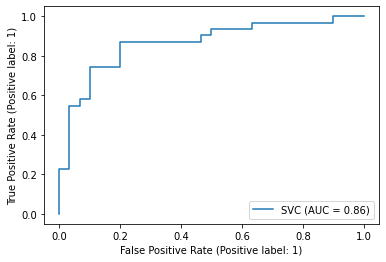

In [79]:
# Plot ROC Curve
plot_roc_curve(svm_clf, X_test, y_test)

## RANDOM FOREST

In [80]:
# Dictionary of number of trees with its accuracy score
tas = {}

for i in range(1, 2000, 100):
    rf_clf = RandomForestClassifier(n_estimators=i)
    rf_clf.fit(X_train_ws, y_train)
    tas.update({str(i): rf_clf.score(X_test_ws, y_test)})

In [81]:
max(tas.values())

0.8032786885245902

In [83]:
# Grid search for other parameters
rf_grid = {"max_depth": [5, 8, 15, 25, 30],
           "min_samples_split": [2, 5, 10, 15, 100],
           "min_samples_leaf": [2, 5, 10],
           "n_estimators": [100, 150, 200]}

In [84]:
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid = rf_grid,
                     cv = 5,
                     verbose = True)

gs_rf.fit(X_train_ws, y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 8, 15, 25, 30],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [100, 150, 200]},
             verbose=True)

In [85]:
gs_rf.score(X_test_ws, y_test)

0.7540983606557377

In [86]:
rf_params = gs_rf.best_params_

In [87]:
rf_params

{'max_depth': 8,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 100}

In [88]:
rf_cv = cross_val_score(RandomForestClassifier(random_state=7, max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators= 150),
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')

In [89]:
rf_cv.mean()

0.8381967213114756

In [90]:
rf_cv.std() * 100

4.849073303161097

In [91]:
# Default model cross-validation
rf_cv2 = cross_val_score(RandomForestClassifier(random_state=7),
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')

In [92]:
rf_cv2.mean()

0.8414754098360657

In [93]:
rf_cv2.std() * 100

3.7395738784332275

In [94]:
# Final model
rf_clf = RandomForestClassifier(random_state=7, n_estimators=100)
rf_clf.fit(X_train_ws, y_train)

RandomForestClassifier(random_state=7)

In [95]:
rf_clf.score(X_test_ws, y_test)

0.8032786885245902

In [96]:
rf_clf.score(X_train_ws, y_train)

1.0

In [97]:
rf_y_preds = rf_clf.predict(X_test_ws)

In [98]:
print(confusion_matrix(y_test, rf_y_preds))

[[23  7]
 [ 5 26]]


In [100]:
print(classification_report(y_test,rf_y_preds))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.79      0.84      0.81        31

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



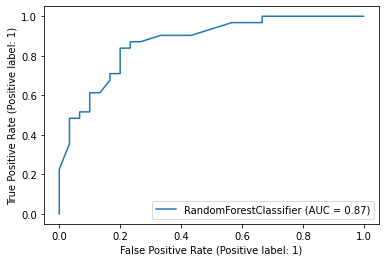

In [101]:
plot_roc_curve(rf_clf, X_test, y_test);

In [102]:
# Final scores with hyperparameter tuning
f_scores = {
            "KNN:": rs_KNN.score(X_test, y_test) ,
            "Logistic Regression:": rs_log_reg.score(X_test, y_test),
            "SVM Kernel:": gs_svm.score(X_test, y_test),
            "Random Forest:": rf_clf.score(X_test_ws, y_test)}

In [103]:
for i in f_scores:
    print(i, f_scores[i])

KNN: 0.819672131147541
Logistic Regression: 0.8032786885245902
SVM Kernel: 0.8032786885245902
Random Forest: 0.8032786885245902
